# Parcial I - Métodos Computacionales

**2025-1**

---

Nombre: Laura Sofía Sierra Sánchez

Identificación: 1025528785

---

* ⚠ Explique su código usando con comentarios,

* ❗Todas las funciones deben tener documentación básica,

* 🛑 El uso de IA's no está permitido,

* ⚛ La interpretación del enunciado hace parte de la evaluación,

* ⏲ Este parcial tiene una duración de 2 horas

In [18]:
# Librerias útiles
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import factorial
from scipy.optimize import root_scalar, newton, bisect # Funciones para raices

## Ayudas
# np.sign (Signo de una variable)
# np.deg2rad (Convertir grados a radianes)
# pd.Dataframe Genera un dataframe a partir de un diccionario o listas
# range(0, 10, 2) (Pasos de 2 comenzando en 0 hasta 10)

# 1

**(40 puntos)** El **método de Ridder** es un algoritmo de búsqueda de raíces que, como la bisección, requiere un intervalo $[a, b]$ tal que $f(a) \cdot f(b) < 0$. A diferencia de la bisección, Ridder introduce una corrección exponencial para acelerar la convergencia, logrando **convergencia cuadrática** sin requerir derivadas.

---
### Pasos para implementar

1. **Definir la función** $f(x)$ y un intervalo $[a, b]$ tal que:

   - $f(a) \cdot f(b) < 0$ (la función tiene signos opuestos en los extremos del intervalo).
   - La función debe ser continua en $[a, b]$.

2. **Calcular el punto medio**:

   $$
   m = \frac{a + b}{2}
   $$

3. **Calcular la corrección exponencial**:

   - Evaluar $f(a)$, $f(b)$ y $f(m)$.
   - Calcular:

     $$
     s = \sqrt{f(m)^2 - f(a) f(b)}
     $$

   - Si $s = 0$, detener: la raíz no puede estimarse en esta iteración.

   - Calcular el nuevo candidato a raíz:

     $$
     x = m + \frac{(m - a) f(m)}{s} \cdot \text{sign}(f(a) - f(b))
     $$

4. **Evaluar $f(x)$** y actualizar el intervalo:

   - Si $f(m) \cdot f(x) < 0$, entonces la nueva raíz está entre $m$ y $x$.
   - Si $f(a) \cdot f(x) < 0$, entonces actualizar $b = x$, luego $f(b) = f(x)$.
   - Si $f(b) \cdot f(x) < 0$, entonces actualizar $a = x$, luego $f(a) = f(x)$.
   - En cada paso mantener la condición $f(a) \cdot f(b) < 0$.

5. **Criterio de parada**:

   - Repetir los pasos anteriores hasta que se alcance la tolerancia deseada:

     $$
     |f(x)| < \varepsilon \quad \text{o} \quad |b - a| < \delta
     $$

   donde $\varepsilon$ y $\delta$ son tolerancias establecidas por el usuario.

---

* Defina una función llamada `Ridder` que calcule la raiz de una función dada. Su función debe tener documentación y retornar el valor de la raiz junto con el número de iteraciones empleadas para alcanzar la convergencia dada una tolerancia.

* Usando
$$\cos(x) = x,$$

Grafique la función para $0\leq x \leq \pi/2$ usando 100 puntos. Luego, cree un DataFrame con los datos de $x$ y $f(x)$, y encuentre una primera aproximación a la raiz aplicando un filtro en el dataframe con los valores más cercanos a cero.

* Usando el método de Ridder encuentre la raiz númericamente y compare su resultado usando el método de bisección y secante.

* Para las siguientes tolerancias (ver código) realice un gráfico usando escala logaritimica en $y$ de cuantas iteraciones son necesarias hasta alcanzar la convergencia. ¿Qué puede concluir acerca de la misma?

```python
# Tolerancias
tol = np.logspace(-1, -20, 20)

# Grafico semilog

plt.semilogy(N, tol)

```

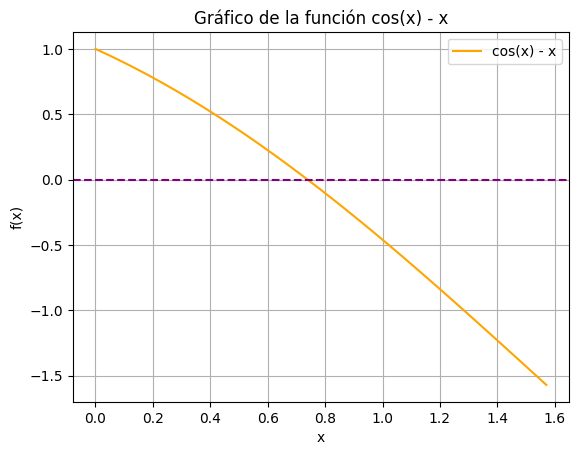

Aproximación inicial de la raíz: 0.7457315894884863
Método de Ridder: raíz = 0.7364317603, iteraciones = 100
Método de Bisección: raíz = 0.7390851263, iteraciones = 18
Método de la Secante: raíz = 0.7390851330, iteraciones = 6


In [22]:
# Aquí va su código

def Ridder(f, a, b, tol=1e-16, max_iter=100):
  '''
  Definir el método de Ridder para encontrar una raíz de una función en un intervalo [a, b]

  Parámetros:
  - f : función a encontrar raíces
  - a : float extremo intervalo inicial (izquierdo)
  - b : extremo intervalo final (derecho)
  - tol : tolerancia para el critero de parada
  - max_iter : número de iteraciones máximas

  Retorna:
  - x : valor de la raíz aproximada
  - n : número de iteraciones empleadas hasta alcanzar la convergencia
  '''
  fa = f(a)
  fb = f(b)

  if fa * fb >= 0:
    raise ValueError("La función debe de tener signos opuestos (extremos del intervalo)")

  for n in range(1, max_iter + 1): # Iterar hasta hallar el punto medio
    m = (a + b) / 2
    fm = f(m)

  s = np.sqrt(((fm)**2) - (fa*fb)) # Calcular la corrección exponencial
  if s == 0:
    raise RuntimeError("La raíz debe ser diferente a 0")

  x = m + (((m - a)*fm) / s) * np.sign(fa - fb) # Calcular el nuevo candidato de raíz
  fx = f(x)

  if abs(fx) < tol or abs(a - b) < tol: # Criterio de parada
    return x, n

  # Evaluar f(x) y actualizar el intervalo
  if fm * fx < 0:
    a, fa = m, fm
    b, fb = x, fx
  elif fa * fx < 0:
    b, fb = x, fx
  else:
    a, fa = x, fx

  return x, n


# Graficar cos(x) = x
f = lambda x: np.cos(x) - x # Definir la función cos(x) - x = 0

x_valores = np.linspace(0, np.pi/2, 100)
y_valores = f(x_valores)

# Pasos para graficar
plt.plot(x_valores, y_valores, label='cos(x) - x', color='orange')
plt.axhline(0, color='purple', linestyle='--')
plt.title('Gráfico de la función cos(x) - x')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

# Crear DataFrame
df = pd.DataFrame({'x': x_valores, 'f(x)': y_valores})
df['abs_f(x)'] = np.abs(df['f(x)'])
aproximacion = df.loc[df['abs_f(x)'].idxmin(), 'x']
print(f"Aproximación inicial de la raíz: {aproximacion}")

def biseccion(f, a, b, tol=1e-6, max_iter=100):
  fa, fb = f(a), f(b)
  if fa * fb >= 0:
      raise ValueError("La función debe tener signos opuestos en los extremos del intervalo.")

  for n in range(1, max_iter + 1):
    c = (a + b) / 2
    fc = f(c)

    if abs(fc) < tol or abs(b - a) < tol:
      return c, n

    if fa * fc < 0:
      b, fb = c, fc
    else:
      a, fa = c, fc

  return c, n

def secante(f, x0, x1, tol=1e-6, max_iter=100):
  f0, f1 = f(x0), f(x1)

  for n in range(1, max_iter + 1):
      if abs(f1) < tol:
          return x1, n

      if f1 == f0:
          break

      x_new = x1 - f1 * (x1 - x0) / (f1 - f0)
      x0, x1 = x1, x_new
      f0, f1 = f1, f(x_new)

  return x1, n

# Encontrar raíces con los diferentes métodos
a, b = 0, np.pi/2
ridder_root, ridder_iter = Ridder(f, a, b)
bisect_root, bisect_iter = biseccion(f, a, b)
secante_root, secante_iter = secante(f, a, b)

print(f"Método de Ridder: raíz = {ridder_root:.10f}, iteraciones = {ridder_iter}")
print(f"Método de Bisección: raíz = {bisect_root:.10f}, iteraciones = {bisect_iter}")
print(f"Método de la Secante: raíz = {secante_root:.10f}, iteraciones = {secante_iter}")


#2

**(60 puntos)** En óptica, cuando un rayo de luz atraviesa la interfaz entre dos medios con diferentes índices de refracción, su dirección cambia según la ley de Snell. Para el caso de un prisma triangular, cuando un rayo emerge después de dos refracciones, el ángulo de desviación total $\delta$ está dado por:

$$\delta(\theta_i) = \theta_i + \arcsin\left(n\sin\left(A - \arcsin\left(\frac{\sin\theta_i}{n}\right)\right)\right) - A$$

donde $\theta_i$ es el ángulo de incidencia, $n$ es el índice de refracción del prisma y $A$ es el ángulo del prisma.

La derivada de esta función con respecto al ángulo de incidencia $\theta_i$ es:

$$\frac{d\delta}{d\theta_i} = 1 - \frac{\cos\theta_i \cdot \cos(A-\theta_r)}{\cos\theta_r \cdot \sqrt{1-n^2\sin^2(A-\theta_r)}}$$

donde $\theta_r = \arcsin\left(\frac{\sin\theta_i}{n}\right)$ es el ángulo de refracción en la primera interfaz.

Considere un prisma de vidrio crown con $n = 1.52$ y $A = 60°$.

### Parte A:
* Escriba una función explicita y documentada para $\frac{d\delta}{d\theta_i}$

* Realice un gráfico para $\frac{d\delta}{d\theta_i}$ y encuentre el ángulo de incidencia $\theta_i$ que produce el ángulo de desviación mínimo para $\theta_i \in [30°, 80°]$.

* Use el método de Newton-Raphson (sin derivada) y el método de la secante para hallar el ángulo de desviación mínimo.


### Parte B:
* Determine el ángulo crítico $\theta_c$ para el cual el rayo comienza a experimentar reflexión interna total en la segunda interfaz del prisma. Esta condición ocurre cuando:

$$\sin(A - \theta_r) = \frac{1}{n}$$

* Resuelva numéricamente la ecuación anterior para encontrar el ángulo de incidencia $\theta_i$ correspondiente a este ángulo crítico, utilizando el método de la bisección.





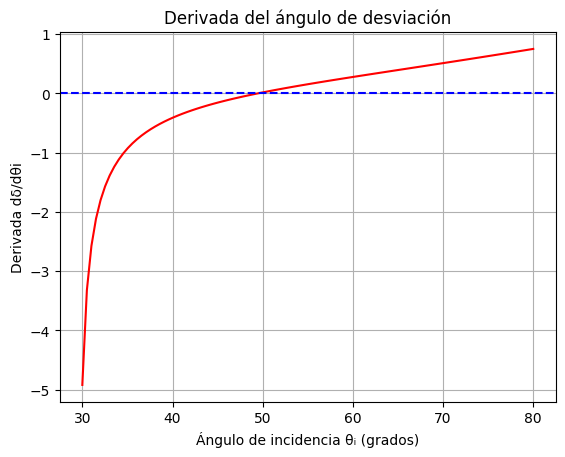

Ángulo de incidencia para desviación mínima (Newton-Raphson): 49.464197888683415°
Ángulo de incidencia para desviación mínima (Secante): 49.46419788868386°
Ángulo crítico para reflexión interna total: 29.430187205734903°
Verificación: sin(A - θ_r) = 0.6578947368427408, 1/n = 0.6578947368421053


In [27]:
# PARTE A

# Parámetros del prisma
n = 1.52  # Índice de refracción
A = np.radians(60)  # Ángulo del prisma en radianes

def ddelta_dtheta(theta_i):
  """
  Calcula la derivada del ángulo de desviación respecto al ángulo de incidencia

  Parámetros:
  - theta_i : ángulo de incidencia en radianes

  Retorna:
  - valor de la derivada
  """
  theta_r = np.arcsin(np.sin(theta_i)/n)
  sin_term = n * np.sin(A - theta_r)

  numerador = np.cos(theta_i) * np.cos(A - theta_r)
  denominador = np.cos(theta_r) * np.sqrt(1 - n**2 * np.sin(A - theta_r)**2)

  return 1 - numerador / denominador

# Rango de ángulos de incidencia (30° a 80°)
theta_rango = np.radians(np.linspace(30, 80, 100))
ddelta_valores = ddelta_dtheta(theta_rango)

# Graficar
plt.plot(np.degrees(theta_rango), ddelta_valores, color='red')
plt.axhline(0, color='blue', linestyle='--')
plt.xlabel('Ángulo de incidencia θᵢ (grados)')
plt.ylabel('Derivada dδ/dθi')
plt.title('Derivada del ángulo de desviación')
plt.grid()
plt.show()

def delta(theta_i):
  """
  Calcula el ángulo de desviación total
  """
  theta_r = np.arcsin(np.sin(theta_i)/n)
  term = n * np.sin(A - theta_r)
  return theta_i + np.arcsin(term) - A

# Usamos la aproximación por diferencias finitas para la derivada
def newton_raphson(f, x0, tol=1e-6, max_iter=100):
  for n in range(max_iter):
    fx = f(x0)
    h = 1e-6
    dfx = (f(x0 + h) - f(x0 - h))/(2*h)  # Diferencias finitas centrales
    x_new = x0 - fx/dfx
    if abs(x_new - x0) < tol:
      return x_new
    x0 = x_new
  return x_new

theta_min_newton = newton_raphson(ddelta_dtheta, np.radians(50))
print(f"Ángulo de incidencia para desviación mínima (Newton-Raphson): {np.degrees(theta_min_newton)}°")

def secante(f, x0, x1, tol=1e-6, max_iter=100):
  for n in range(max_iter):
    fx0 = f(x0)
    fx1 = f(x1)
    x_new = x1 - fx1 * (x1 - x0)/(fx1 - fx0)
    if abs(x_new - x1) < tol:
      return x_new
    x0, x1 = x1, x_new
  return x_new

theta_min_secante = secante(ddelta_dtheta, np.radians(40), np.radians(60))
print(f"Ángulo de incidencia para desviación mínima (Secante): {np.degrees(theta_min_secante)}°")


# PARTE B
def critical_condition(theta_i):
  """
  Función para encontrar el ángulo crítico de reflexión interna total.
  """
  theta_r = np.arcsin(np.sin(theta_i)/n)
  return np.sin(A - theta_r) - 1/n

# Encontrar el ángulo crítico usando bisección
theta_c = bisect(critical_condition, np.radians(0), np.radians(90))
print(f"Ángulo crítico para reflexión interna total: {np.degrees(theta_c)}°")

# Verificación
theta_r_c = np.arcsin(np.sin(theta_c)/n)
print(f"Verificación: sin(A - θ_r) = {np.sin(A - theta_r_c)}, 1/n = {1/n}")

